![alt_text](http://www.sciencephoto.com/image/515937/large/C0162772-Child_having_ECG_during_exercise-SPL.jpg 'Child having an ECG test done')

# Welcome to the Analyze ECG notebook!
#### By the end of this notebook, you will be able to...

_1. Understand what an ECG is._

_2. Recognize the five parts of an ECG and why they occur._

_3. Examine your own heart data!_

---

Instructions: To run a code block, click on it to __select__ it, and then press __SHIFT__ and __ENTER__ or click the __PLAY__ arrow in the top left corner of the block. Note that you do __not__ need to understand Python to use this notebook--just run each code cell and observe the plots that follow it.

To begin the notebook, press the "Reset file name" button. This lesson comes with two ECG example files: __ECG_Example1__ and __ECG_Example2__. Select the file you would like to use, then run each code block that follows.

---

## So, what is an ECG and why should we be learning about it?

ECG stands for __electrocardiogram__, which is a test that records the electrical activity that moves through the heart. As the different parts of our heart depolarize (lose voltage) and repolarize (gain voltage), the ECG shows these changes in voltage in a distinct pattern as shown and labeled in the image below.

![alt_text](http://www.ubooks.pub/Books/B0/E7R7777/MAIN/images/QTinterval.png "Labeled EKG Wave")

---

## That's cool, but what do these peaks in the ECG wave mean? 

Each of the peaks in the wave shown above represent electrical activity passing through a different part of the heart. The short video below will explain each part of the wave:

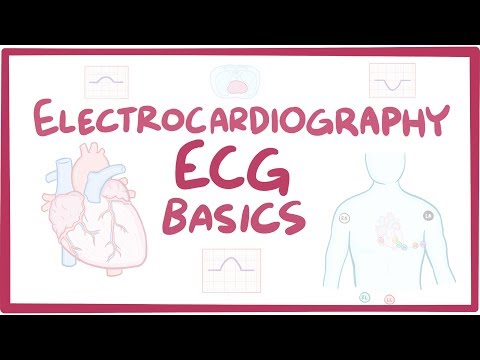

In [1]:
from IPython.display import YouTubeVideo
# a short video about interpreting ECG
# Video credit: Osmosis.
YouTubeVideo('xIZQRjkwV9Q')

---

## Why are ECG tests important? What's the point?

An EEG test is capable of detecting abnormalities in heart rhythm. These abnormalities may indicate diseases or disorders such as __a previous heart attack__, __misshapen or enlarged portions of the heart__, __high cholesterol__, and __insufficient blood flow__. These diseases and disorders may be identified by specific abnormalities in the ECG waves. For example, the image below shows a normal __Sinus__ rhythm in the top right ECG followed by ECGs that characterize various heart problems.
![alt_text](http://2.bp.blogspot.com/_5Nslwo9F6bI/S_EWJBTuSfI/AAAAAAAAAhI/kKKN4NWJXyM/s1600/ECG+Cardiac+Abnorm.jpg 'ECG Abnormalities')

---

## Awesome, when can I look at some heart waves?

Right now! Below you will see a prompt that will ask you to select a file to open. Select the either __ECG_Example1.csv__ or __ECG_Example2.csv__.

After you select your file, a plot will appear when you run the final block of code below. The plot has __four__ sliders:  
&emsp;&emsp;(1) x position (2) zoom horizontal (3) y position (4) zoom vertical
    
The plot will automatically update as you move any of the sliders.  

If you wish to __start over__ with a new ECG file, simply re-run the first code block.

#### Good luck and enjoy the _waves_!

---

In [8]:
# Let's begin by uploading a file with ECG data
import os
import warnings
from google.colab import files
import io
warnings.filterwarnings('ignore')
uploaded = files.upload()
import pandas as pd
import numpy as np
for fn in uploaded.keys():
  print("Successfully uploaded file {name}".format(name=fn))
  ecg_data = pd.read_csv(io.BytesIO(uploaded[fn]))
  # Uncomment the line below to print a preview of the data
  # print(ecg_data)

Saving ECG_Example2.csv to ECG_Example2.csv
Successfully uploaded file ECG_Example2.csv


In [0]:
# Let's define our sampling rate and number of samples in our data
Fs = 125 # sampling rate
N = ecg_data.shape[0] # Total number of time samples
T = ecg_data.index.values/Fs # Time samples (second)

---

## Plot the raw ECG signal

In the example ECG files, there is electrical activity data collected from person's heart. We will now plot this data and see if we can recognize the different parts of the wave!

In [10]:
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

[xmin,xmax,ymin,ymax] = [T[0],T[-1],ecg_data.min().min(),ecg_data.max().max()]
[W,H] = [xmax-xmin,ymax-ymin]
def plot_ecg(px,py,pw,ph):
    xx = np.array([px-1/pw/2,px+1/pw/2])
    yy = np.array([py-1/ph/2,py+1/ph/2])
    [x1,x2] = [max(np.floor(xx[0]*N).astype(int),0) , min(np.ceil(xx[1]*N).astype(int),N)]
    
    plt.figure(figsize=(12,5))
    plt.plot(T[x1:x2],ecg_data[x1:x2])
    plt.scatter(T[x1:x2],ecg_data[x1:x2])
    plt.xlim(xmin+W*xx)
    plt.ylim(ymin+H*yy)
    plt.grid()
    plt.ylabel('Voltage')
    plt.title('ECG')
    plt.show()

w_px = widgets.FloatSlider(value=0.5,min=0,max=1,step=0.01,readout=False,orientation='horizontal')
w_py = widgets.FloatSlider(value=0.5,min=0,max=2,step=0.01,description='Y position',readout=False,orientation='vertical')
w_pw = widgets.FloatSlider(value=1,min=0,max=T[-1],step=0.02,readout=False,orientation='horizontal')
w_ph = widgets.FloatSlider(value=1,min=0,max=2,step=0.02,description='Zoom vertical',readout=False,orientation='vertical')
w_update = widgets.ToggleButton(value=True,description='Continuous update',button_style='info',icon='times')

def cont_update(*args):
    if w_update.value:
        w_update.icon = 'times'
        w_px.continuous_update = True; w_py.continuous_update = True
        w_pw.continuous_update = True; w_ph.continuous_update = True
    else:
        w_update.icon = 'repeat'
        w_px.continuous_update = False; w_py.continuous_update = False
        w_pw.continuous_update = False; w_ph.continuous_update = False
w_update.observe(cont_update,'value')

between = Layout(justify_content='space-between')
ui = HBox([HBox([w_update,VBox([Label('X position'),Label('Zoom horizontal')]),VBox([w_px,w_pw]) ],layout=between), w_py,w_ph ])
out = interactive_output(plot_ecg,{'px':w_px,'py':w_py,'pw':w_pw,'ph':w_ph})
display(ui,out)

Output()

## Congratulations! You've completed the notebook, and should have a better understanding of ECG data.